In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

(-1.7720525253537223,
 1.7056591044159115,
 -0.9604080577201762,
 0.9784381080748844)

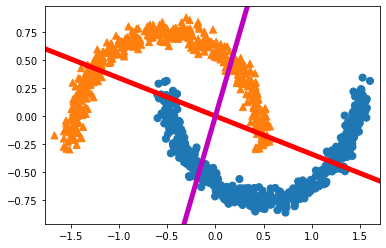

In [7]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)

X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
PC1 = Vt.T[:,0]
PC2 = Vt.T[:,1]

PC1 = (1/PC1[0]) * PC1
PC2 = (1/PC2[0]) * PC2
plt.scatter(X_centered[:, 0], X_centered[:, 1], s=y*50)
plt.scatter(X_centered[:, 0], X_centered[:, 1], s=abs(y-1)*50, marker='^')
x_line = np.array(range(-10,11))
plt.plot(x_line, x_line*PC1[1], 'r', linewidth=5)
plt.plot(x_line, x_line*PC2[1], 'm', linewidth=5)
a = 0.1
plt.axis([np.min(X_centered[:, 0]) - a, np.max(X_centered[:, 0]) + a, np.min(X_centered[:, 1]) - a, np.max(X_centered[:, 1]) + a])
#plt.axis([2+a, -2-a, 2+a, -2-a])

## PCA: Choosing the Right Number of Dimensions

In [10]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)

In [18]:
## By hand, finding d (# of PCs to preserve) that explains 95% of variance
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

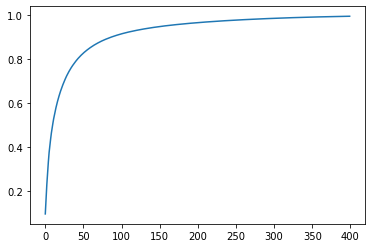

In [20]:
# of dimensions against proportion of variance explained
plt.plot(list(range(400)), cumsum[:400])

# This suggests that about 100 dimensions may be about optimal

In [46]:
pca = PCA(n_components=400)
XdD = pca.fit_transform(X) 
X_reduced = pca.inverse_transform(XdD) # This takes the d dimensional hyperplane and reconfigures the hyperplane back to the MNIST dimensionality

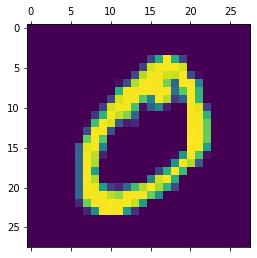

In [41]:
plt.matshow(np.array(X.iloc[1]).reshape(28, 28))

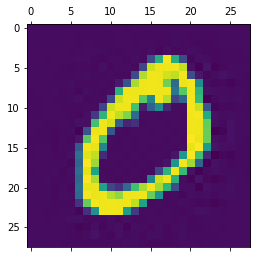

In [47]:
plt.matshow(X_reduced[1].reshape(28, 28))